### Lesson
* Practice using the Accuracy and LogLoss metrics on a classification problem.
* Practice generating a confusion matrix and a classification report.
* Practice using RMSE and RSquared metrics on a regression problem

In [1]:
# Cross Validation Classification LogLoss
import pandas as pd
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
names =  ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

X = df.values[:, 0:8]
y = df.values[:, 8]

In [2]:
# model config
num_folds = 10
num_instances = len(X)
seed = 7

estimator = LogisticRegression()
# scoring = 'log_loss'
scoring = 'accuracy'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)

In [3]:
results = cross_validation.cross_val_score(estimator, X, y, cv=kfold, scoring=scoring)

In [4]:
accuracy = [results.mean(), results.std()]
print(scoring + ":\n\tMean\t{:5.2}\n\tStd.\t{:5.2}".format(accuracy[0], accuracy[1]))

accuracy:
	Mean	 0.77
	Std.	0.048


In [5]:
# outcome of scores for each fold
results

array([ 0.7012987 ,  0.81818182,  0.74025974,  0.71428571,  0.77922078,
        0.75324675,  0.85714286,  0.80519481,  0.72368421,  0.80263158])

In [6]:
from sklearn.metrics import confusion_matrix

model = estimator.fit(X, y)
cm = confusion_matrix(y, model.predict(X))

C:\Miniconda3\envs\sandpit\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


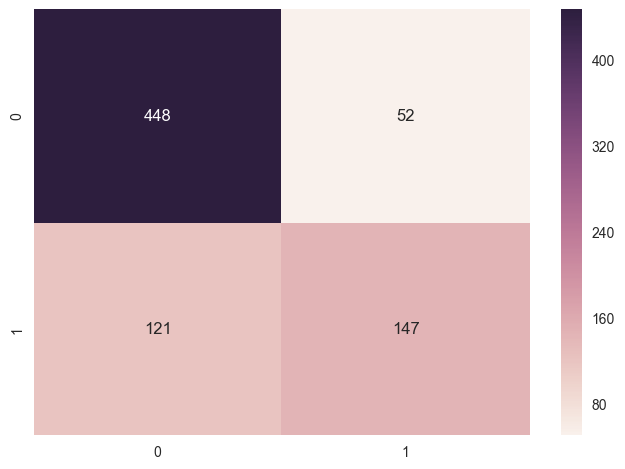

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df, annot=True, fmt="d")

In [8]:
help(cross_validation.cross_val_score)

Help on function cross_val_score in module sklearn.cross_validation:

cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be, for example a list, or an array at least 2d.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.
    
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validati